In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\stripathi\Downloads\sucide_data\Suicide_India.csv")#reading the file

In [4]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [5]:
#data _cleaning
df.replace('A & N Islands', 'A & N Islands (Ut)', inplace=True)
df.replace('Chandigarh', 'Chandigarh (Ut)', inplace=True)
df.replace('D & N Haveli', 'D & N Haveli (Ut)', inplace=True)
df.replace('Daman & Diu', 'Daman & Diu (Ut)', inplace=True)
df.replace('Lakshadweep', 'Lakshadweep (Ut)', inplace=True)
df.replace('Puducherry', 'Puducherry (Ut)', inplace=True)

df.replace('Bankruptcy or Sudden change in Economic', 'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'Other', inplace=True)
df.replace('Other Causes (Please Specity)', 'Other', inplace=True)
df.replace('Others (Please Specify)', 'Other', inplace=True)
df.replace('Not having Children(Barrenness/Impotency', 'Not having Children (Barrenness/Impotency', inplace=True)

In [6]:
 pd.unique(df['Type_code'])

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [148]:
df_a=df.groupby('Type_code')#grouping by Type_code


In [8]:
#creating df by each value of Type_code
def gtgrp(x):
    dfs=df_a.get_group(x)
    return dfs

In [9]:
cause=gtgrp('Causes')
edu=gtgrp('Education_Status')
means=gtgrp('Means_adopted')
professional=gtgrp('Professional_Profile')
social=gtgrp('Social_Status')

In [52]:
#to check the distribution across the Type
def pvtcol(x):
    dfg=pd.pivot_table(df, values = 'Total', index='Gender', columns = (x.Type))#gender
    dfa=pd.pivot_table(df, values = 'Total', index='Age_group', columns = (x.Type))#age
    dfg['max']=(dfg.idxmax(axis=1))#col with max value in a row
    dfa['max']=(dfa.idxmax(axis=1))
    return(dfg,dfa)

In [114]:
def pvtcol_a(x):
    dfg=pd.pivot_table(df, values = 'Total', index='State', columns = (x.Type))#gender
    dfg['max']=(dfg.idxmax(axis=1))#col with max value in a row
    
    return(dfg)

In [115]:
gender_causes,age_causes=pvtcol(cause)
gender_edu,age_edu=pvtcol(edu)
gender_means,age_means=pvtcol(means)
gender_prof,age_prof=pvtcol(professional)
gender_social,age_social=pvtcol(social)

In [118]:
state_causes=pvtcol_a(cause)
state_edu=pvtcol_a(edu)
state_means=pvtcol_a(means)
state_prof=pvtcol_a(professional)
state_social=pvtcol_a(social)

In [12]:
def prnttt(x):
    print(x['max'])
    

In [13]:
prnttt(gender_causes)
prnttt(age_causes)
prnttt(gender_edu)
prnttt(age_edu)
prnttt(gender_means)
prnttt(age_means)
prnttt(gender_prof)
prnttt(age_prof)
prnttt(gender_social)
prnttt(age_social)



Gender
Female    Family Problems
Male      Family Problems
Name: max, dtype: object
Age_group
0-14                       Other
15-29            Family Problems
30-44            Family Problems
45-59            Family Problems
60+      Other Prolonged Illness
Name: max, dtype: object
Gender
Female    Primary
Male      Primary
Name: max, dtype: object
Age_group
0-100+    Primary
Name: max, dtype: object
Gender
Female    By Hanging
Male      By Hanging
Name: max, dtype: object
Age_group
0-14     By Other means
15-29        By Hanging
30-44        By Hanging
45-59        By Hanging
60+          By Hanging
Name: max, dtype: object
Gender
Female    House Wife
Male           Other
Name: max, dtype: object
Age_group
0-14        Student
15-29    House Wife
30-44    House Wife
45-59         Other
60+           Other
Name: max, dtype: object
Gender
Female    Married
Male      Married
Name: max, dtype: object
Age_group
0-100+    Married
Name: max, dtype: object


In [36]:
gender_causes['sum'] = gender_causes.drop('max', axis=1).sum(axis=1)

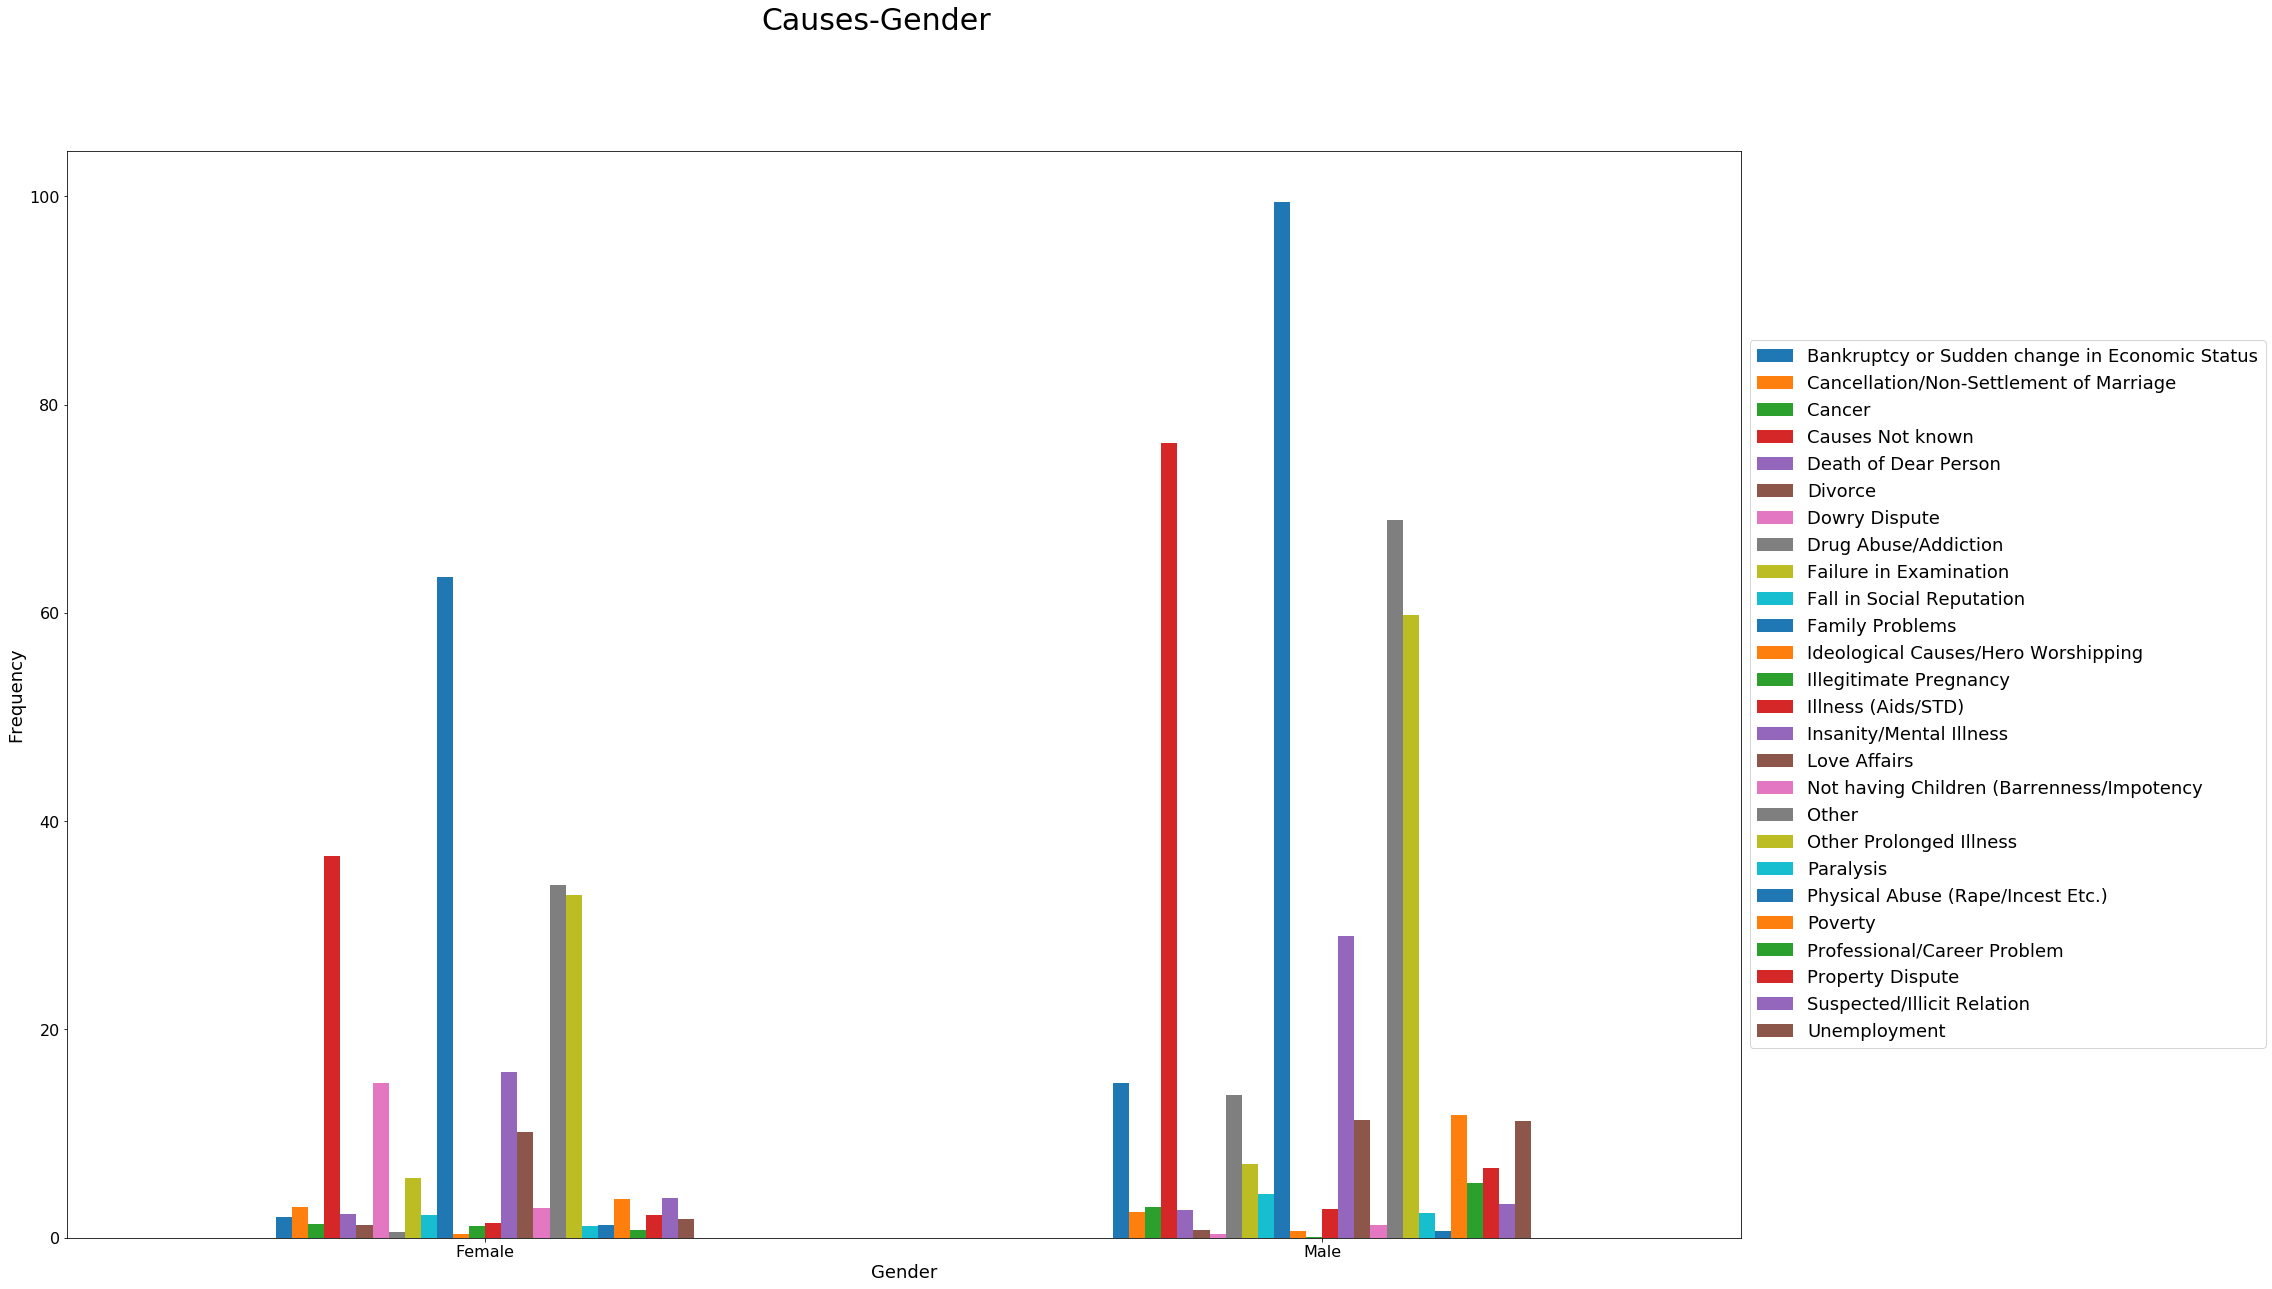

In [89]:
gender_causes.plot.bar(figsize=(30,20))
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.suptitle('Causes-Gender',fontsize=30)
plt.xticks(fontsize=16, rotation=360)
plt.yticks(fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

# Family problems is the main cause for both male and female and in males drug addiction is also a concern

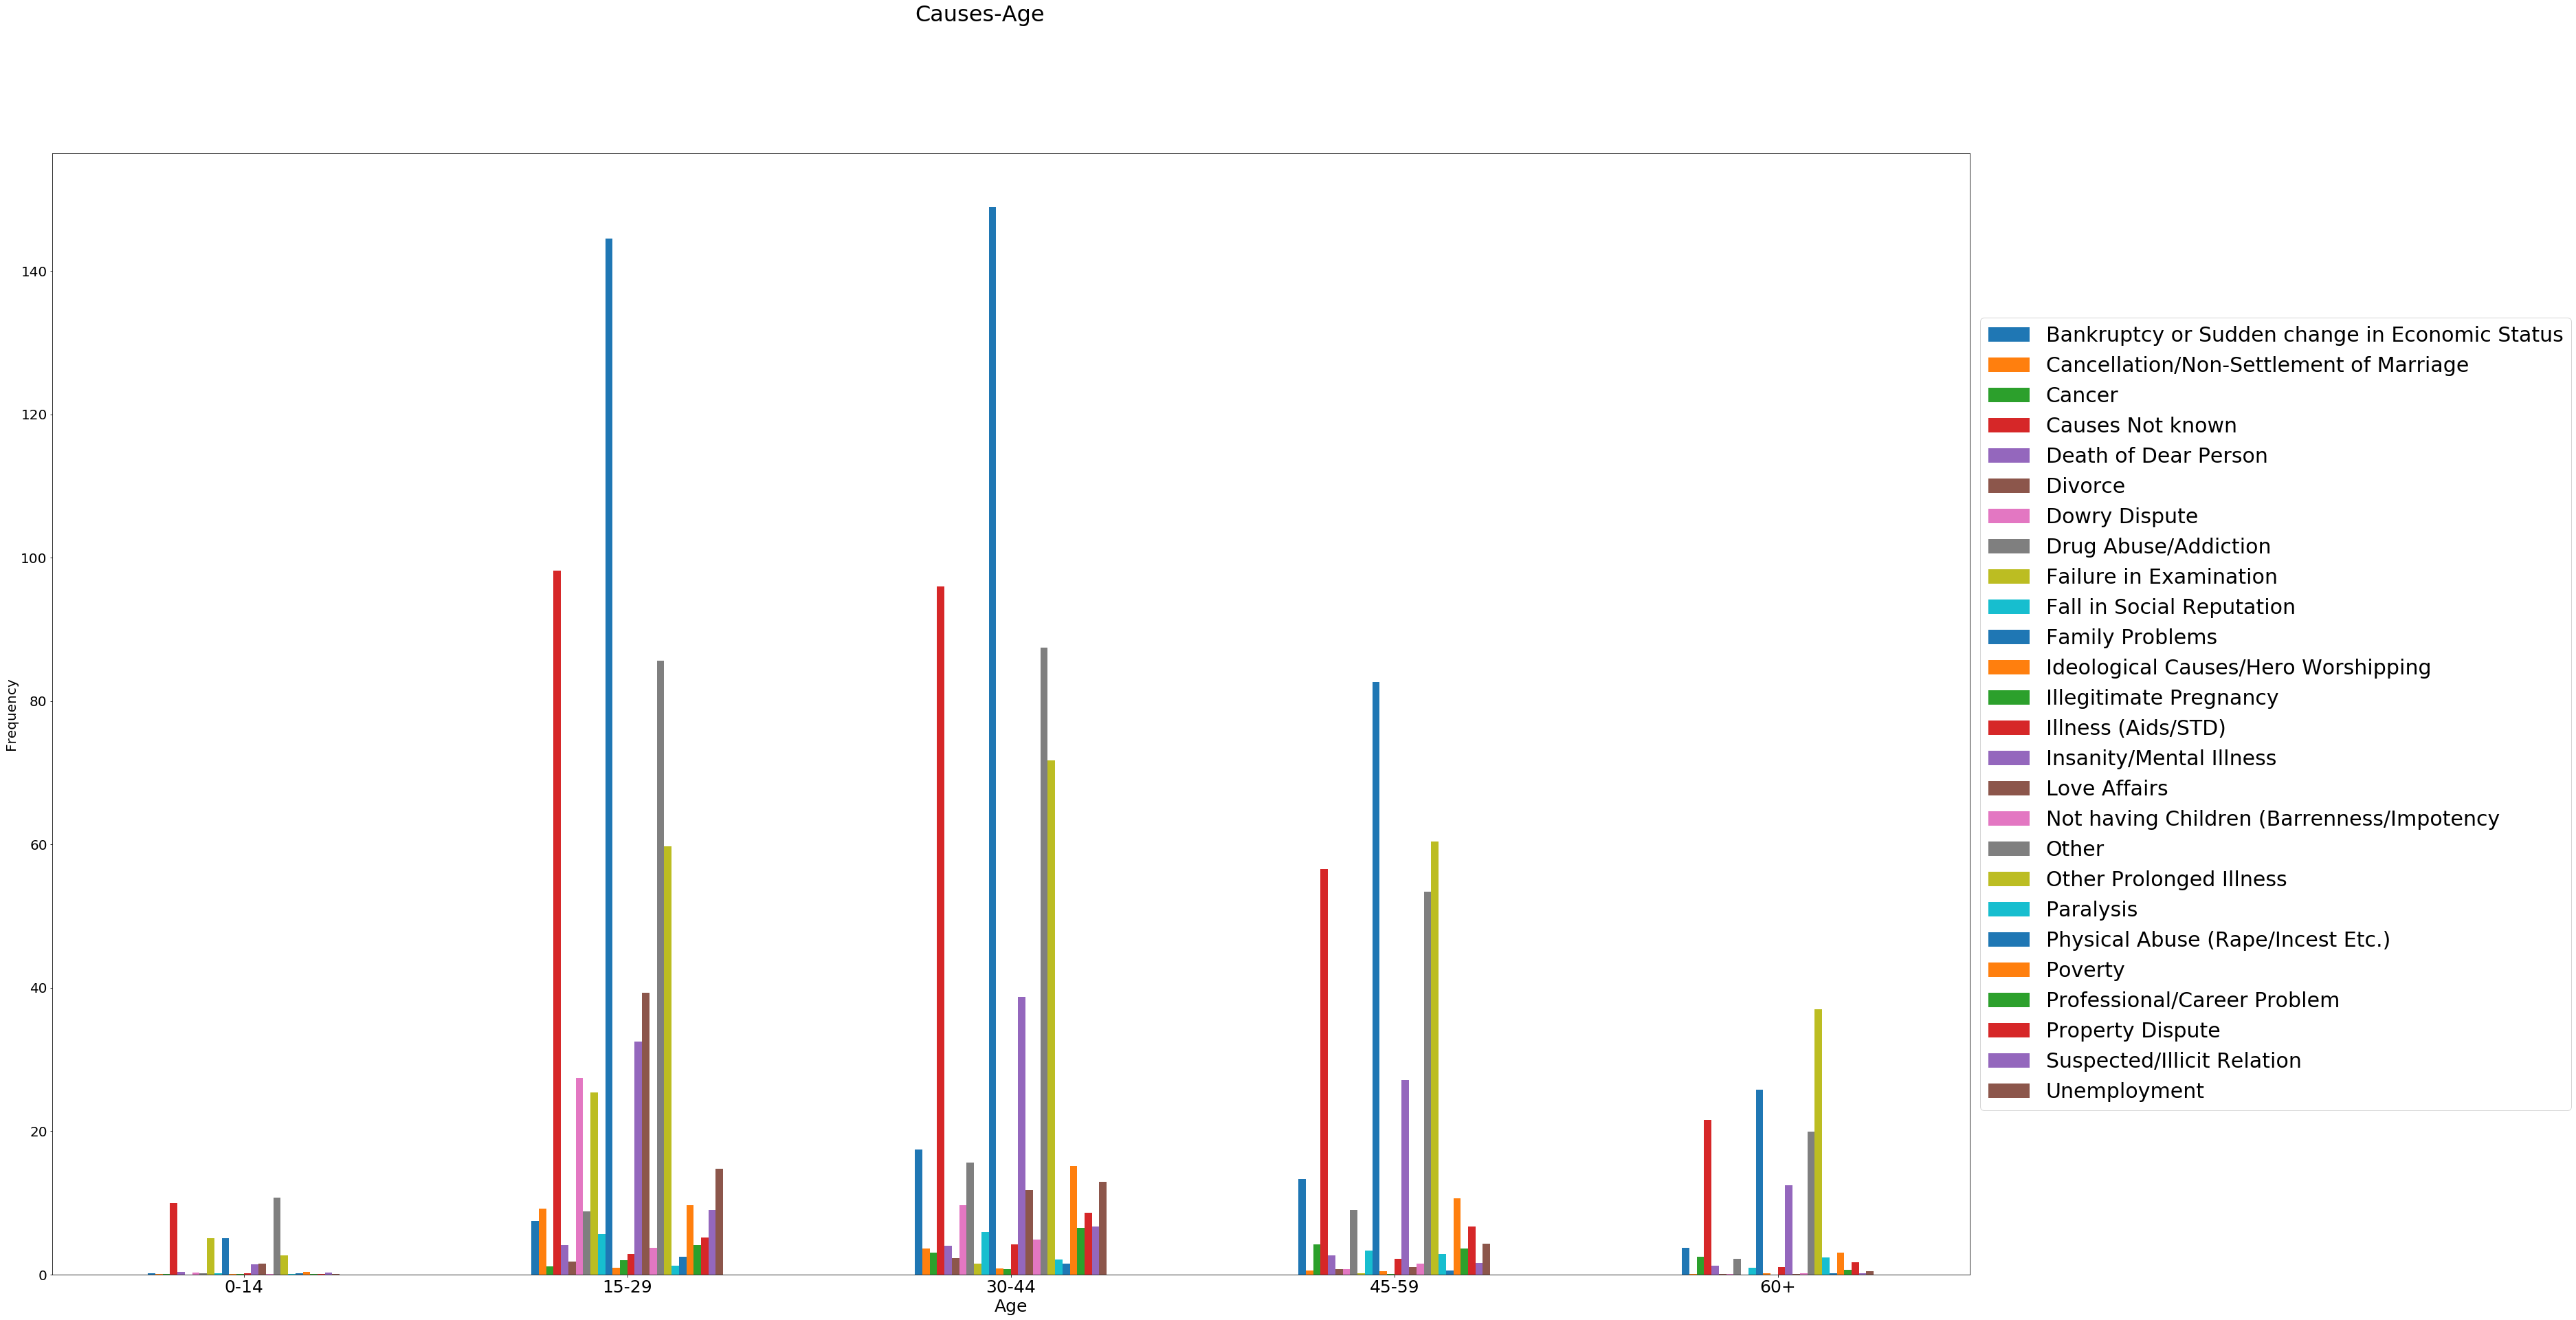

In [110]:
age_causes.plot.bar(figsize=(50,30))
plt.xlabel('Age', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle('Causes-Age',fontsize=32)
plt.xticks(fontsize=25, rotation=360)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

# for age 15-59 Family problems is the main cause, for age 60+,Other Prolonged Illness is the main cause also Love Affairs is one among the main cause in the age group 15-29 which is very low in other age groups

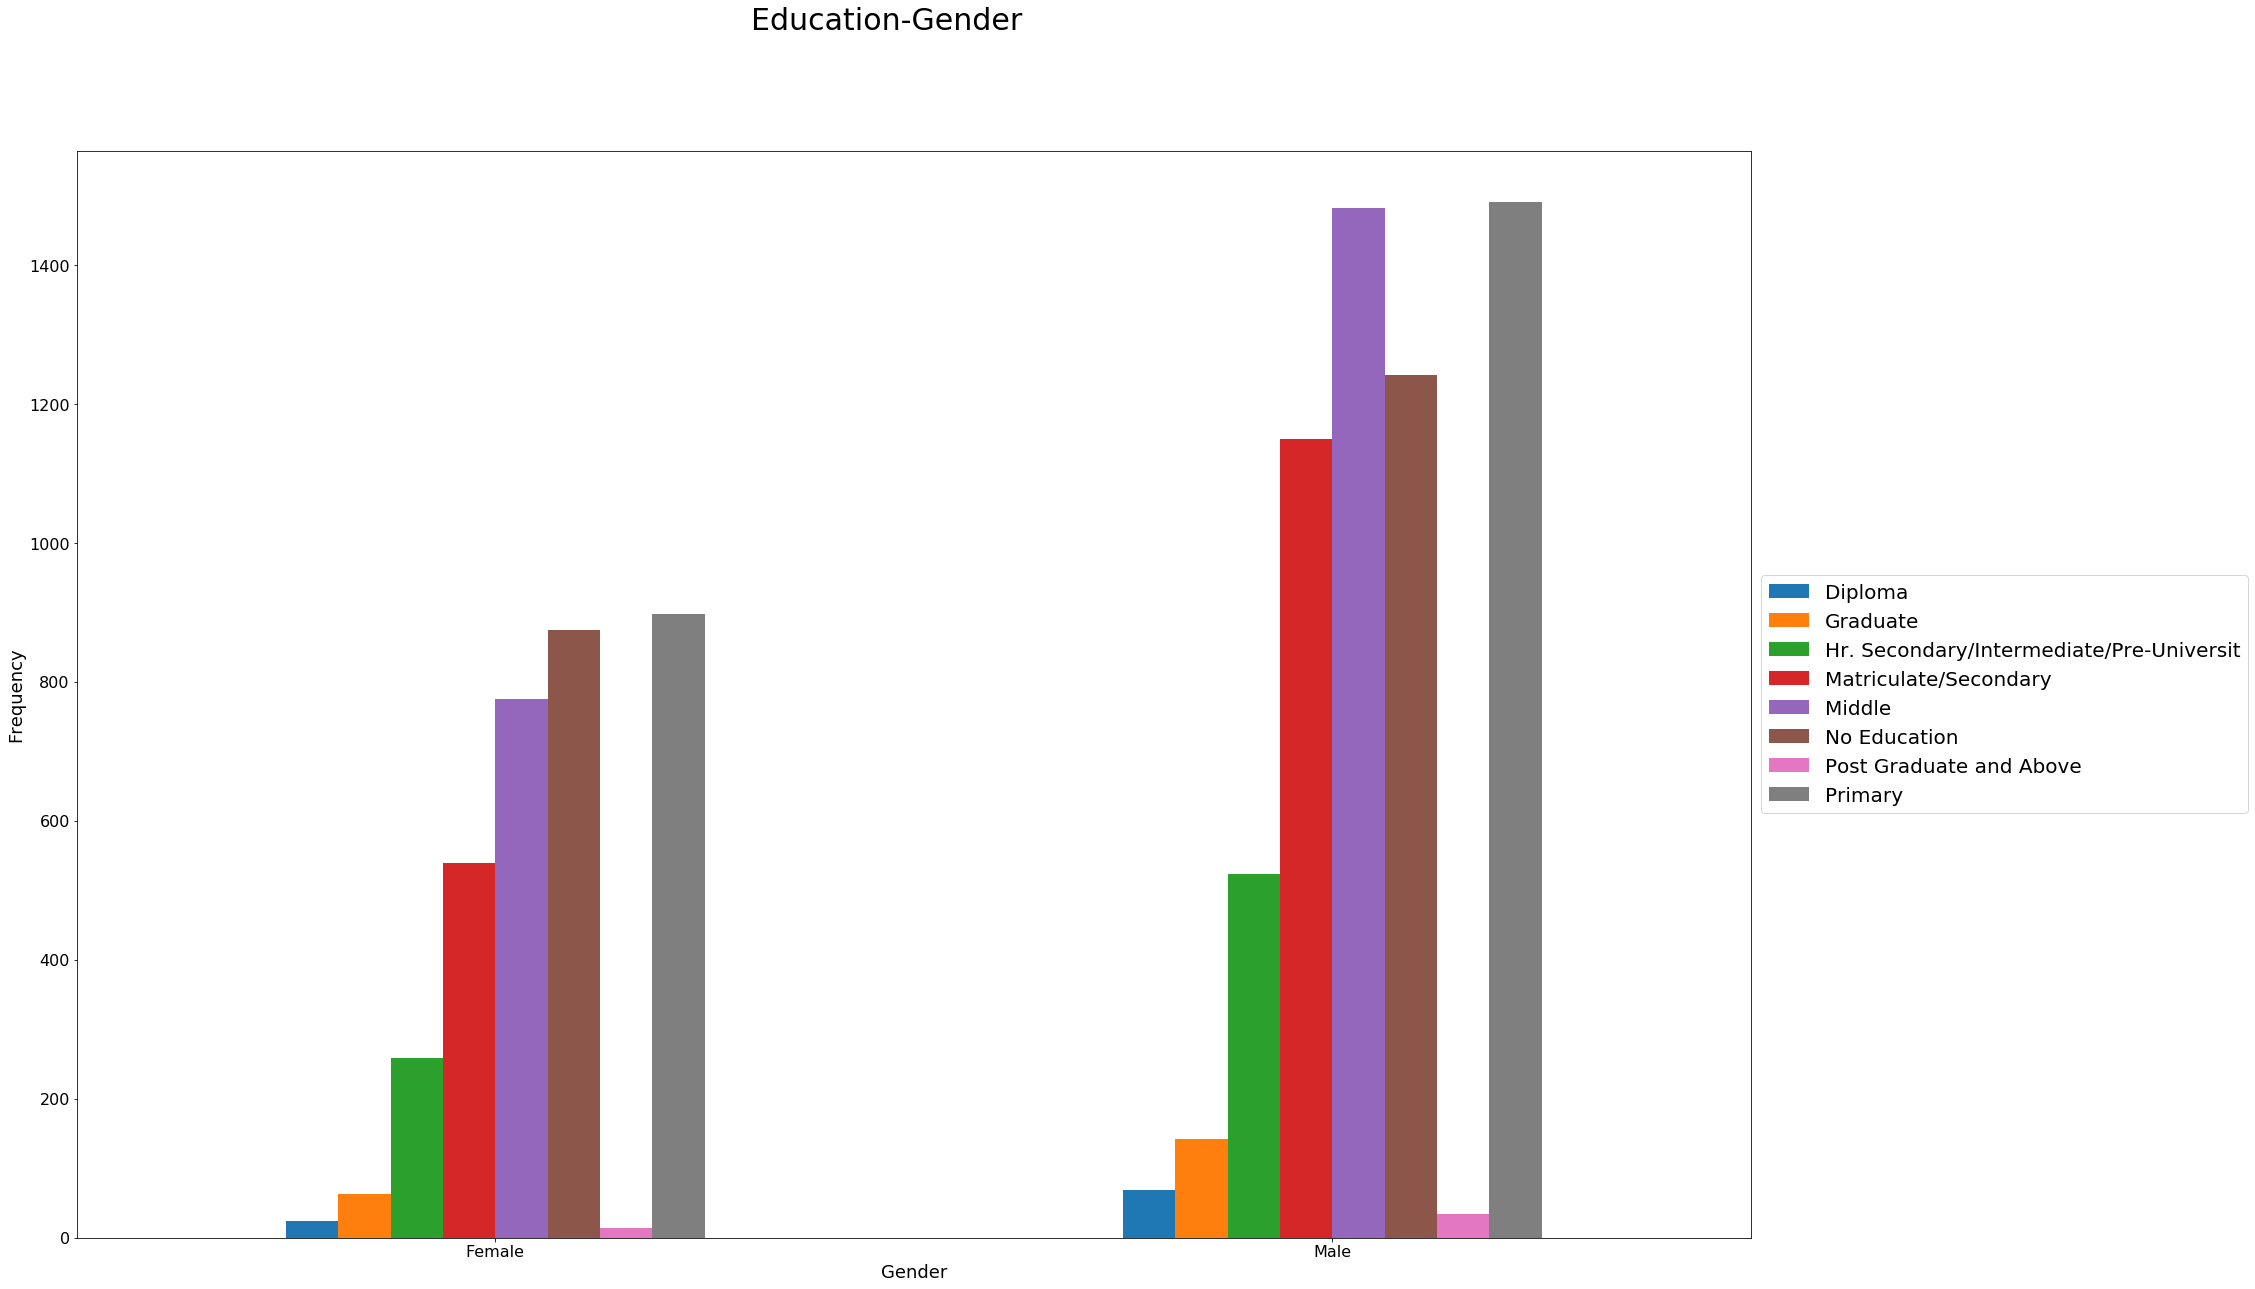

In [99]:
gender_edu.plot.bar(figsize=(30,20))
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.suptitle('Education-Gender',fontsize=30)
plt.xticks(fontsize=16, rotation=360)
plt.yticks(fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)

# Education level in most of the cases is 'Primary' for both male and female closely followed by no education,middle,secondary.


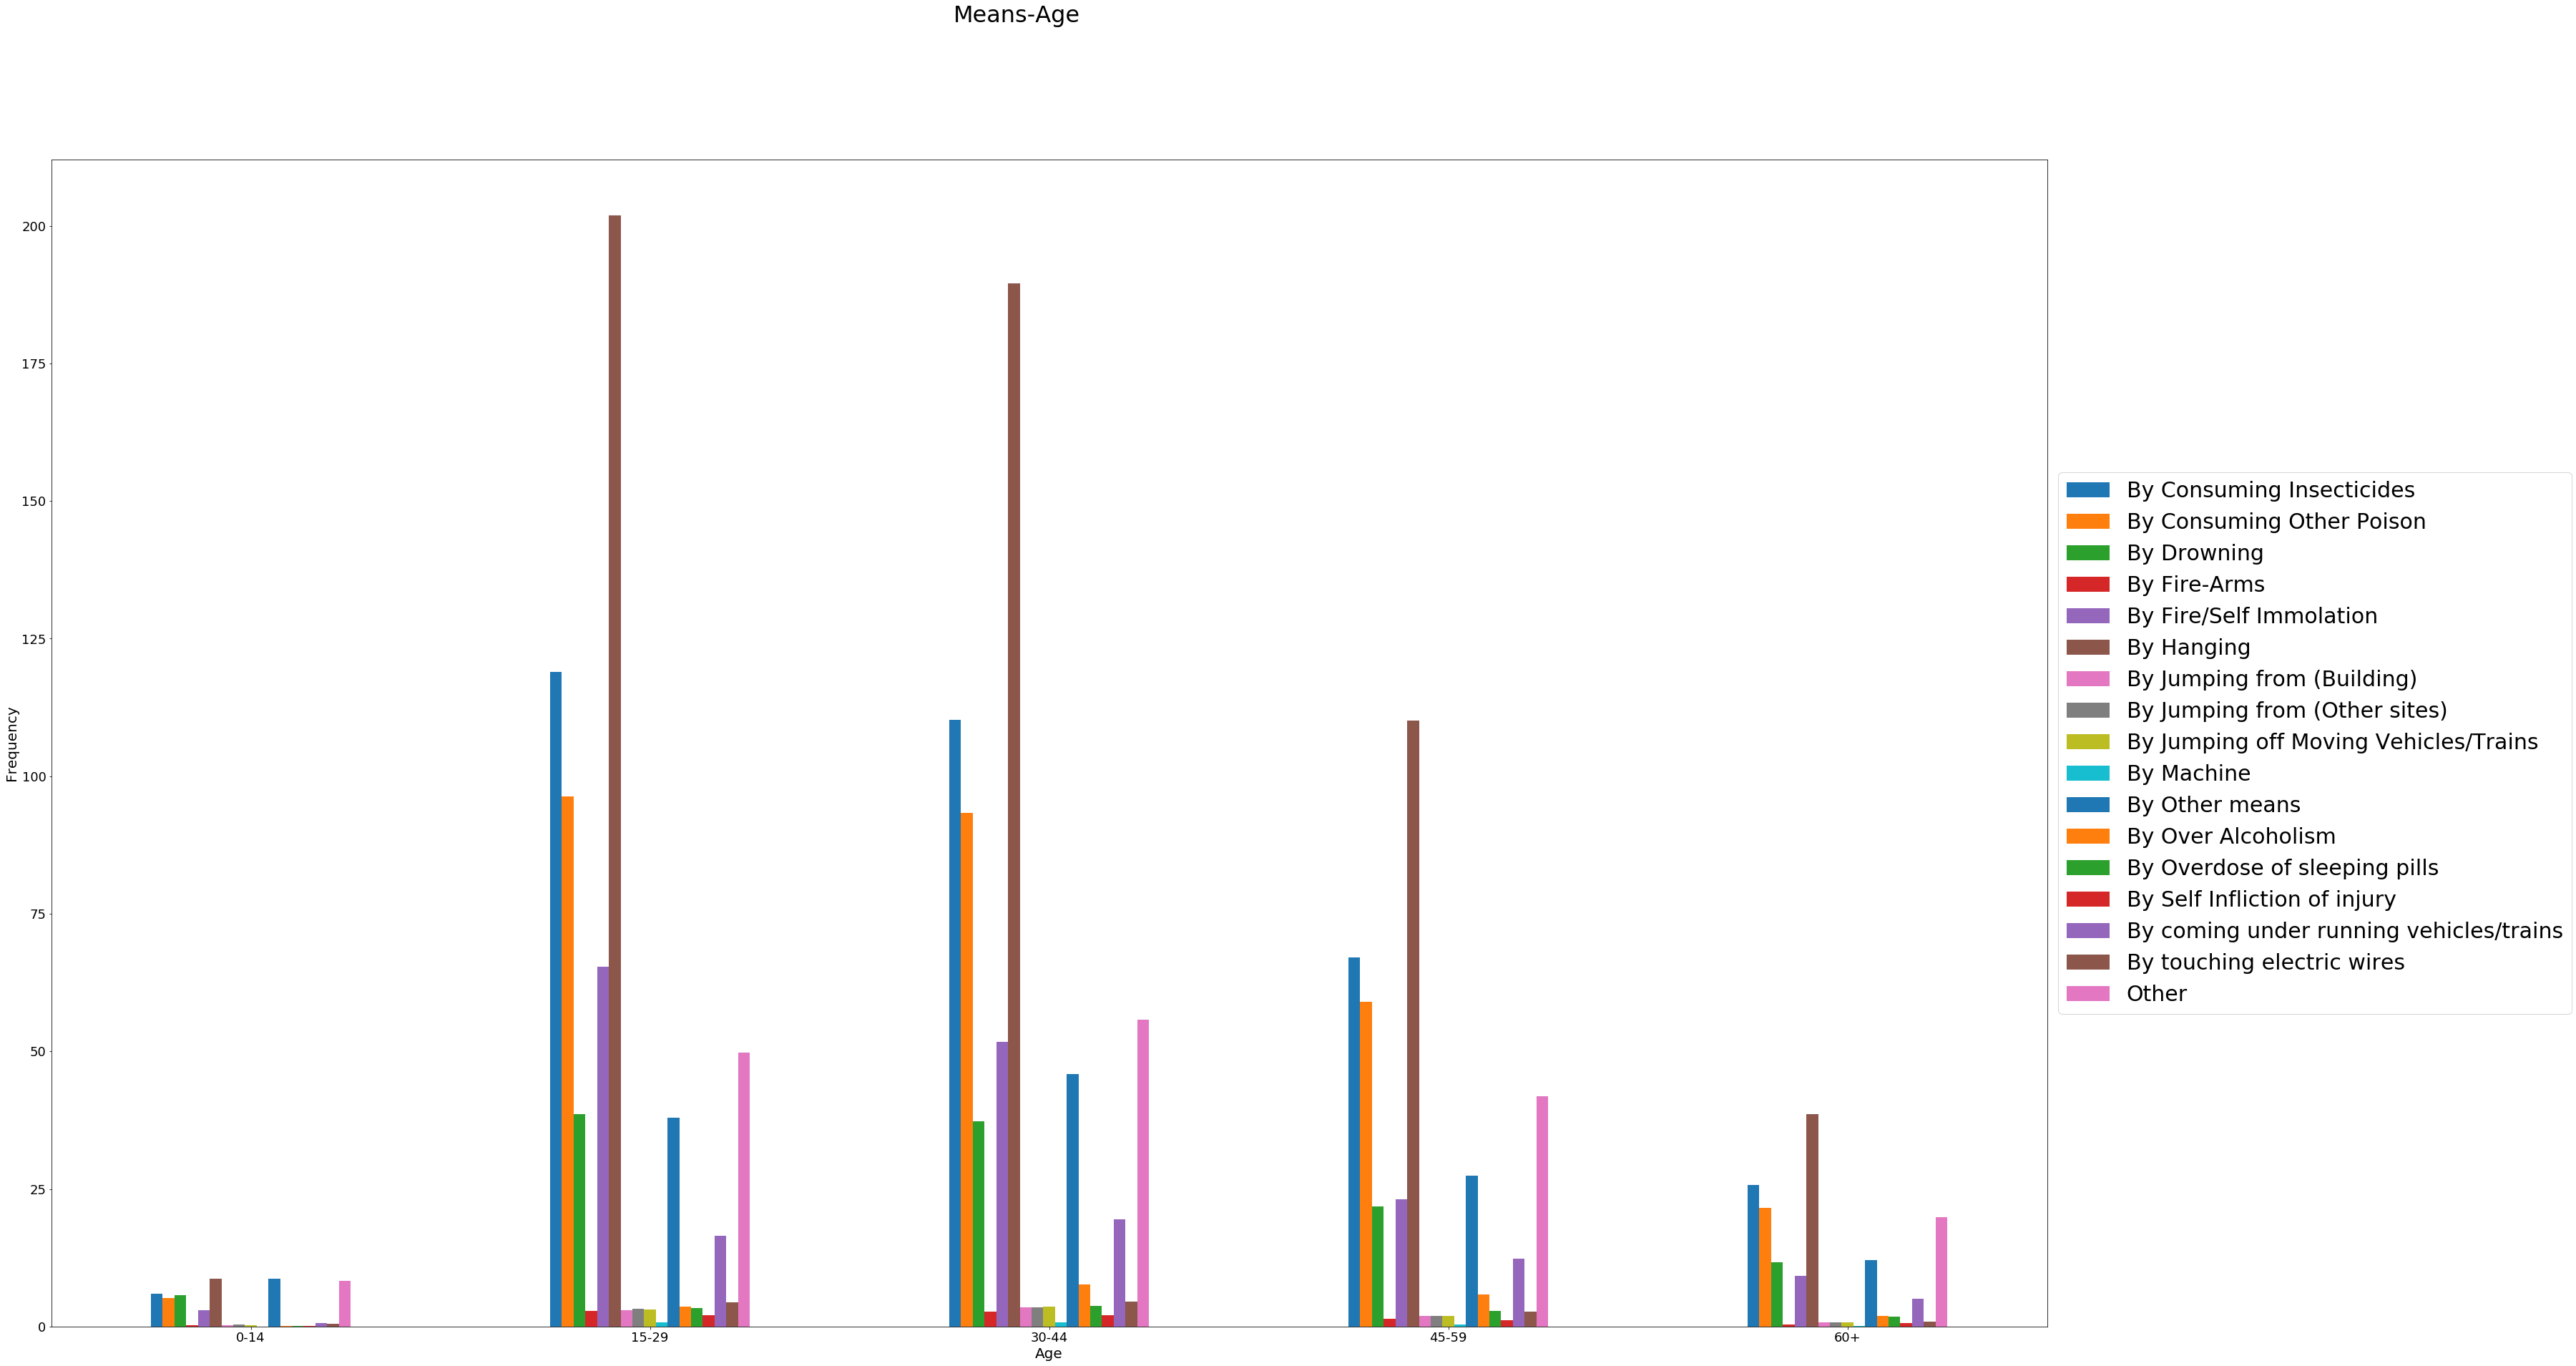

In [105]:
age_means.plot.bar(figsize=(50,30))
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle('Means-Age',fontsize=32)
plt.xticks(fontsize=18, rotation=360)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

# Most common means is ' By Hanging' across all the age followed by consuming insecticides or poison and coming under running vehicles/trains

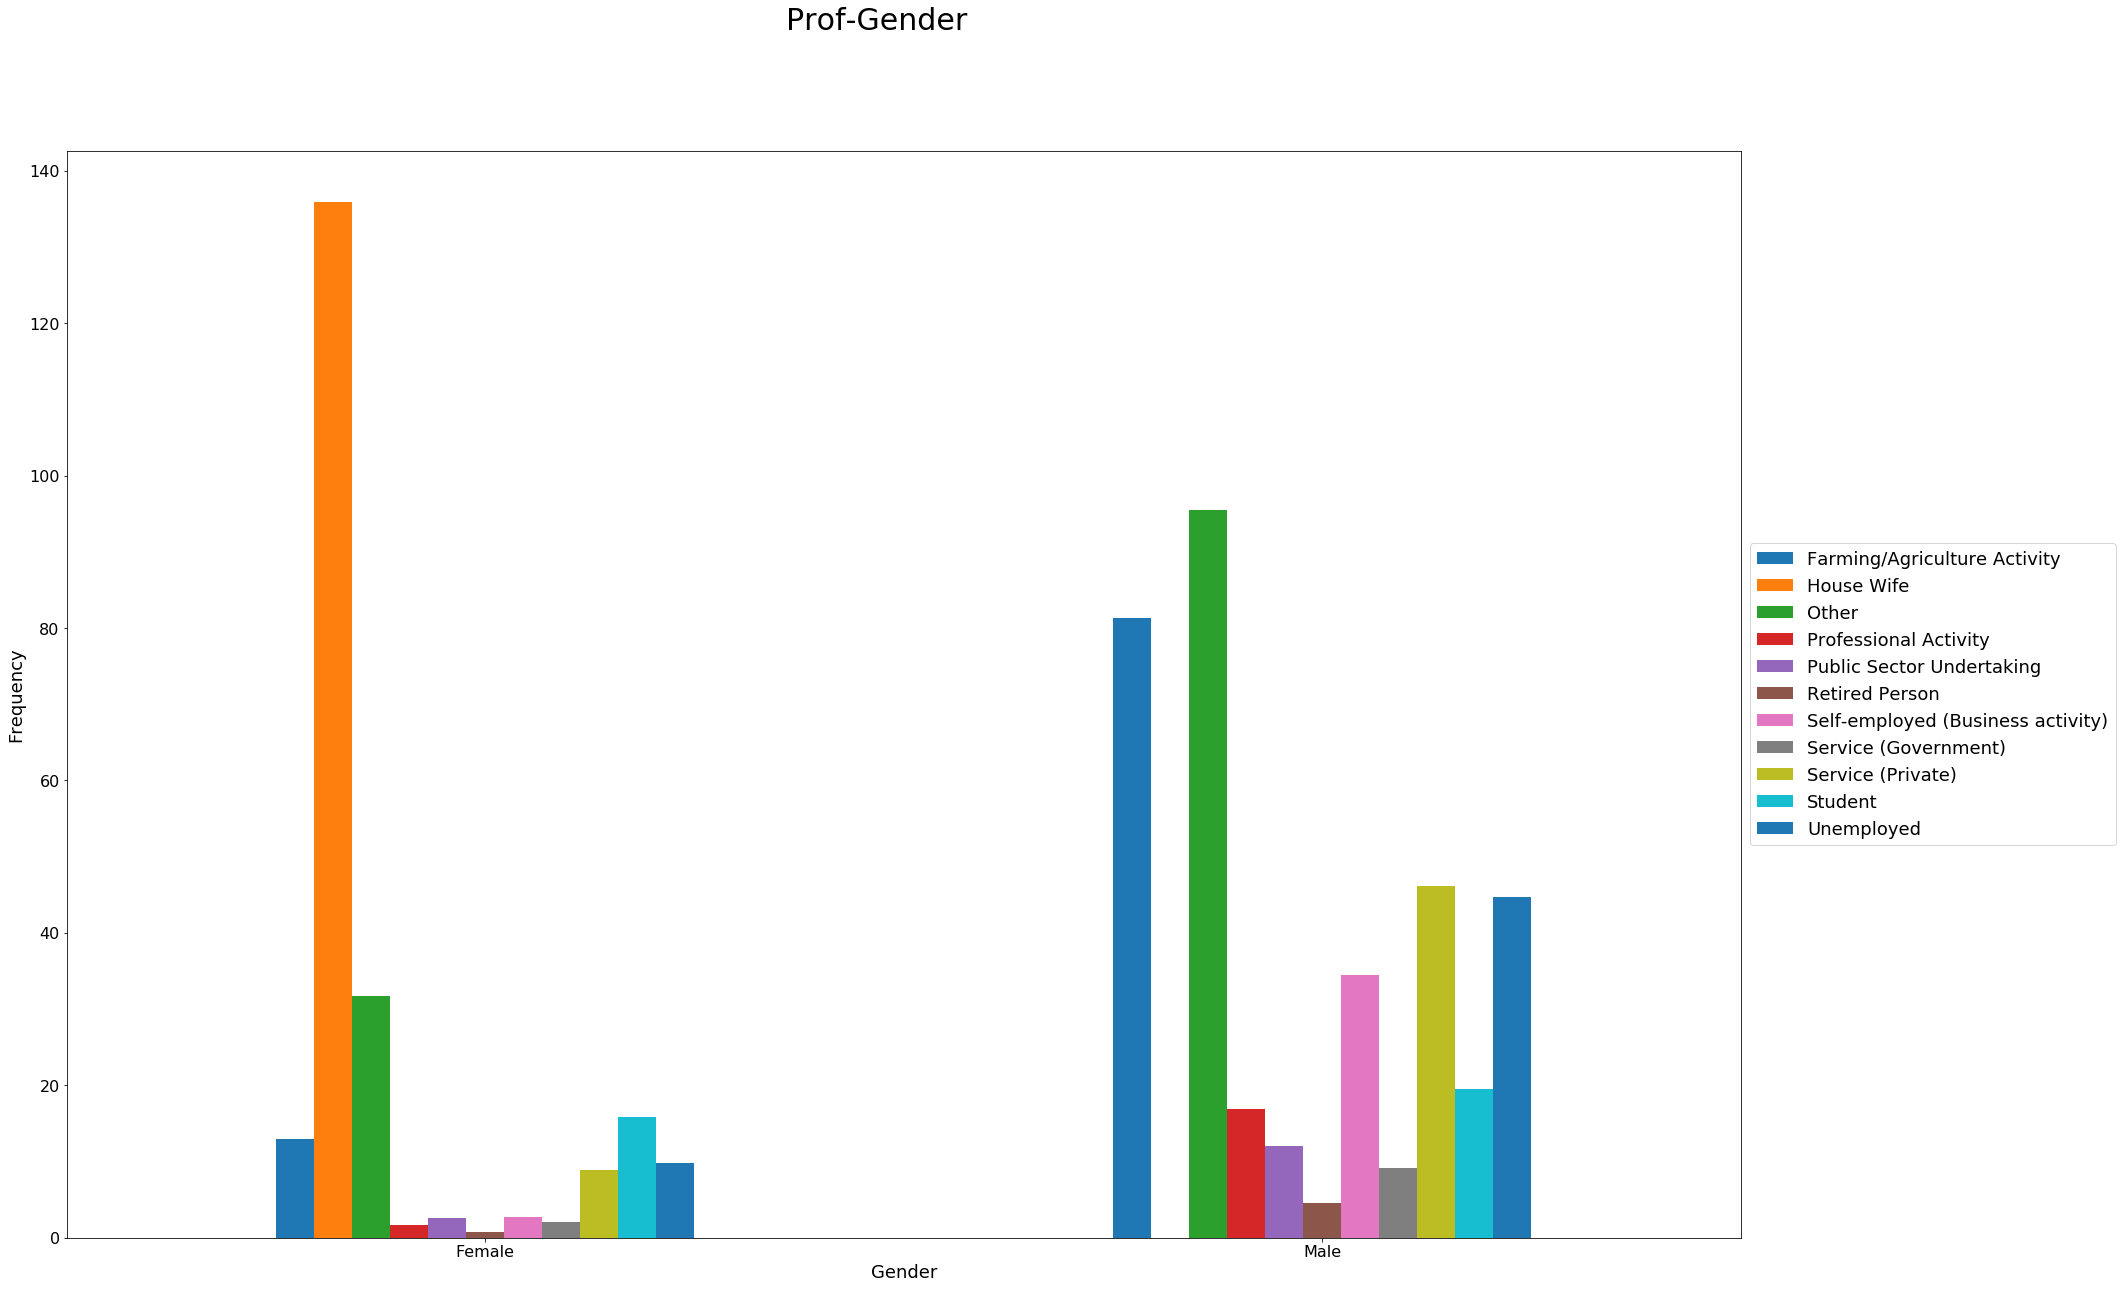

In [106]:
gender_prof.plot.bar(figsize=(30,20))
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.suptitle('Prof-Gender',fontsize=30)
plt.xticks(fontsize=16, rotation=360)
plt.yticks(fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

# Females who commits sucide are mostly 'House Wife' and for males 'Farming' is the main occupation

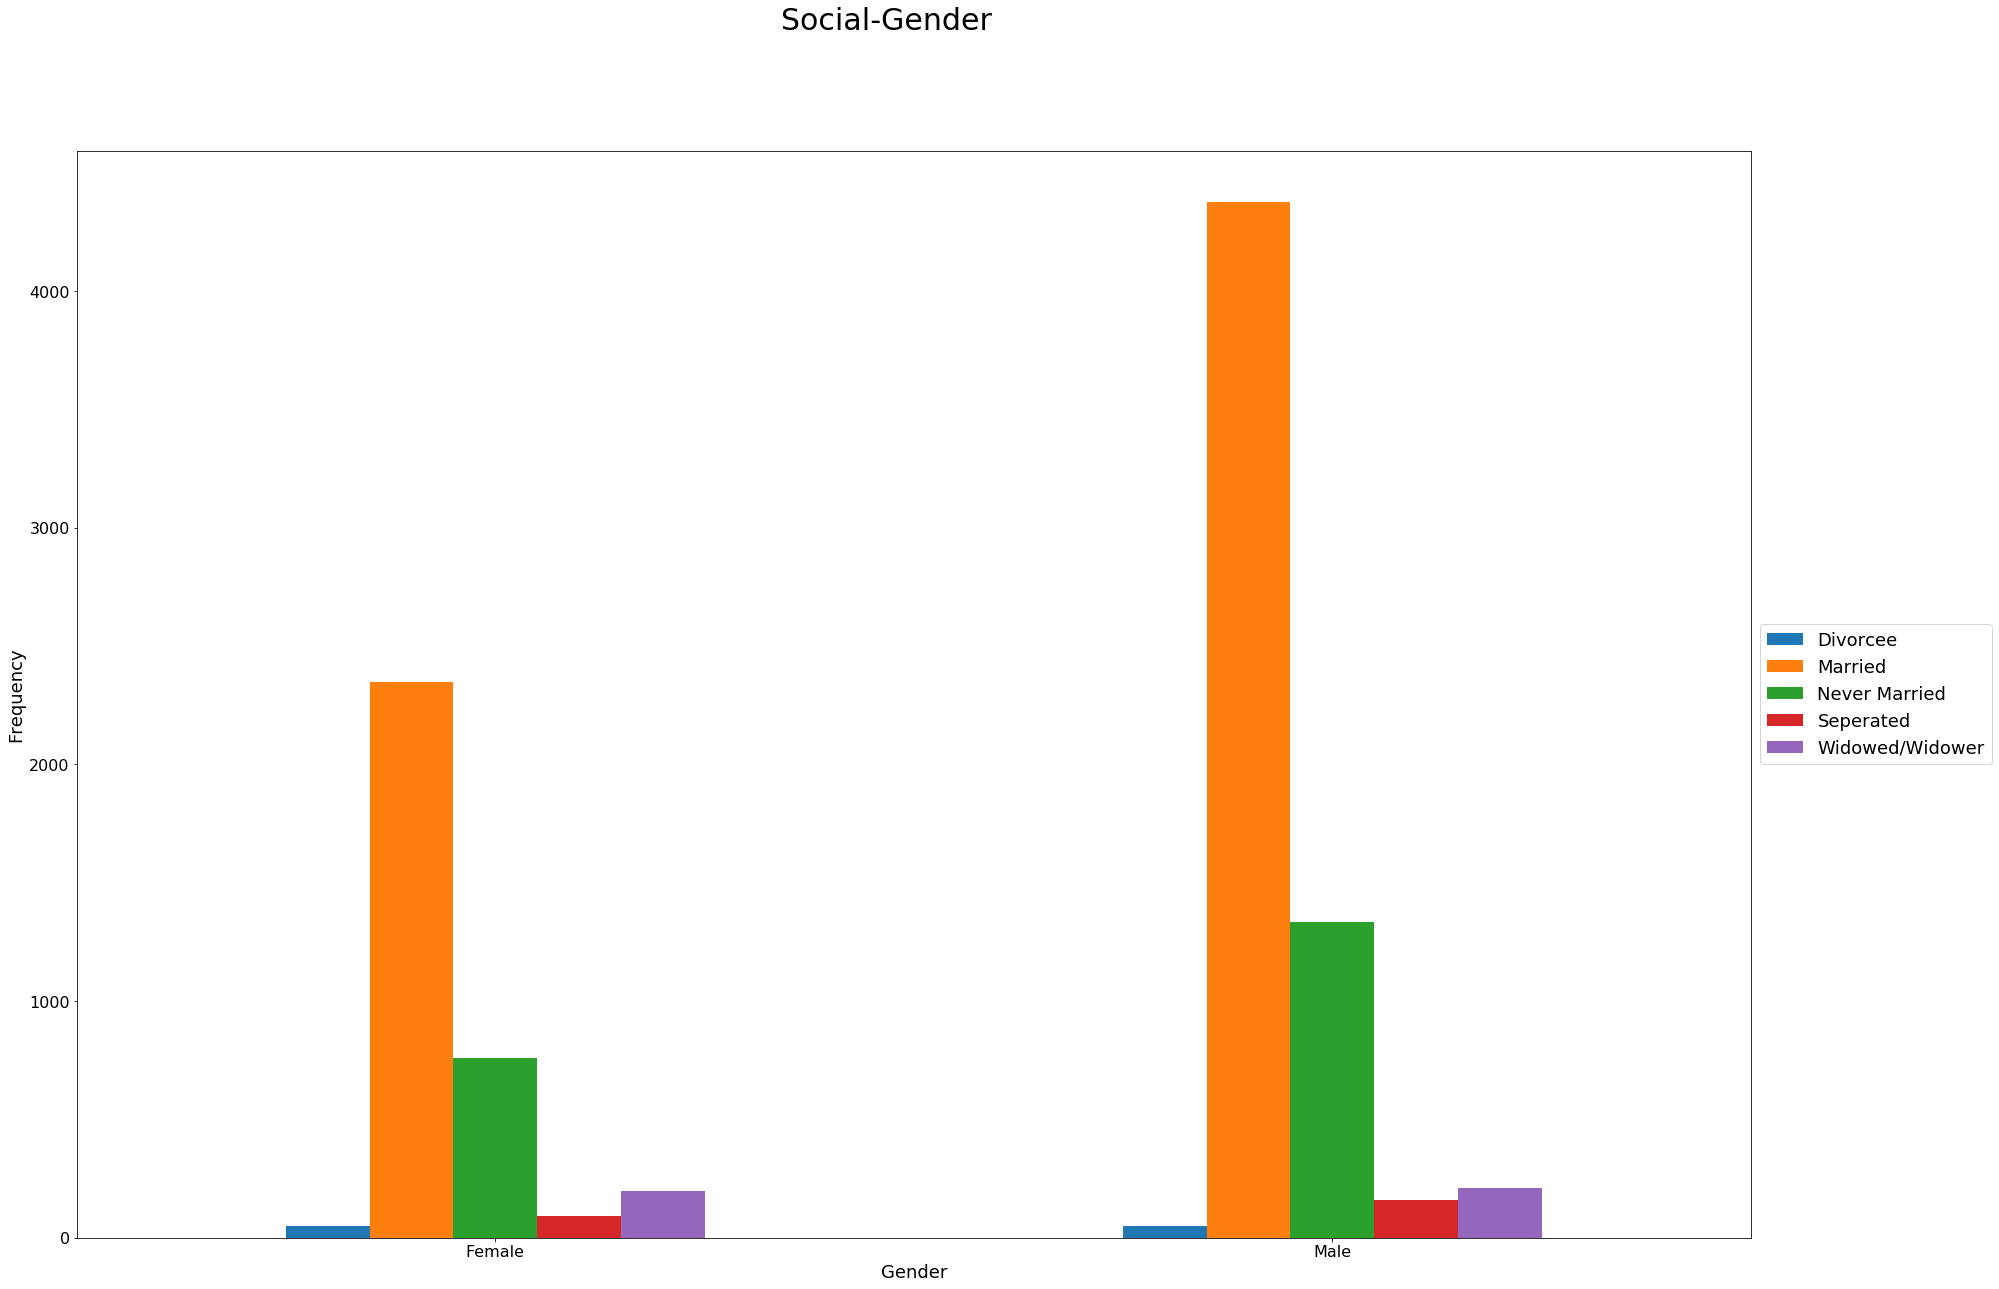

In [108]:
gender_social.plot.bar(figsize=(30,20))
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.suptitle('Social-Gender',fontsize=30)
plt.xticks(fontsize=16, rotation=360)
plt.yticks(fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

# Social status 'Married' is most common for both the genders.

In [143]:
state_causes['sum'] = state_causes.drop('max', axis=1).sum(axis=1)
(state_causes.head())

Type,Bankruptcy or Sudden change in Economic Status,Cancellation/Non-Settlement of Marriage,Cancer,Causes Not known,Death of Dear Person,Divorce,Dowry Dispute,Drug Abuse/Addiction,Failure in Examination,Fall in Social Reputation,...,Other Prolonged Illness,Paralysis,Physical Abuse (Rape/Incest Etc.),Poverty,Professional/Career Problem,Property Dispute,Suspected/Illicit Relation,Unemployment,max,sum
State,,,,,,,,,,,,,,,,,,,,,
A & N Islands (Ut),0.025000,0.058333,0.041667,2.325000,0.083333,0.008333,0.000000,0.000000,0.250000,0.050000,...,2.841667,0.016667,0.000000,0.133333,0.058333,0.050000,0.050000,0.200000,Other,229.925000
Andhra Pradesh,68.766667,6.783333,10.866667,108.025000,6.475000,2.341667,23.075000,6.283333,21.241667,8.183333,...,281.966667,10.400000,1.941667,111.308333,9.133333,16.883333,9.433333,15.775000,Other Prolonged Illness,23066.166667
Arunachal Pradesh,0.066667,0.033333,0.000000,6.775000,0.016667,0.000000,0.000000,0.025000,0.041667,0.008333,...,0.233333,0.008333,0.000000,0.075000,0.025000,0.008333,0.016667,0.166667,Causes Not known,188.133333
Assam,0.866667,2.341667,2.866667,82.691667,2.333333,1.566667,1.216667,1.408333,11.266667,2.883333,...,16.275000,0.766667,0.891667,18.241667,1.266667,19.108333,2.075000,12.625000,Causes Not known,4883.108333
Bihar,0.308333,0.858333,0.158333,10.366667,0.441667,0.333333,3.458333,1.533333,2.341667,0.475000,...,3.375000,0.200000,0.233333,0.566667,0.116667,0.383333,2.225000,0.825000,Other,1309.708333


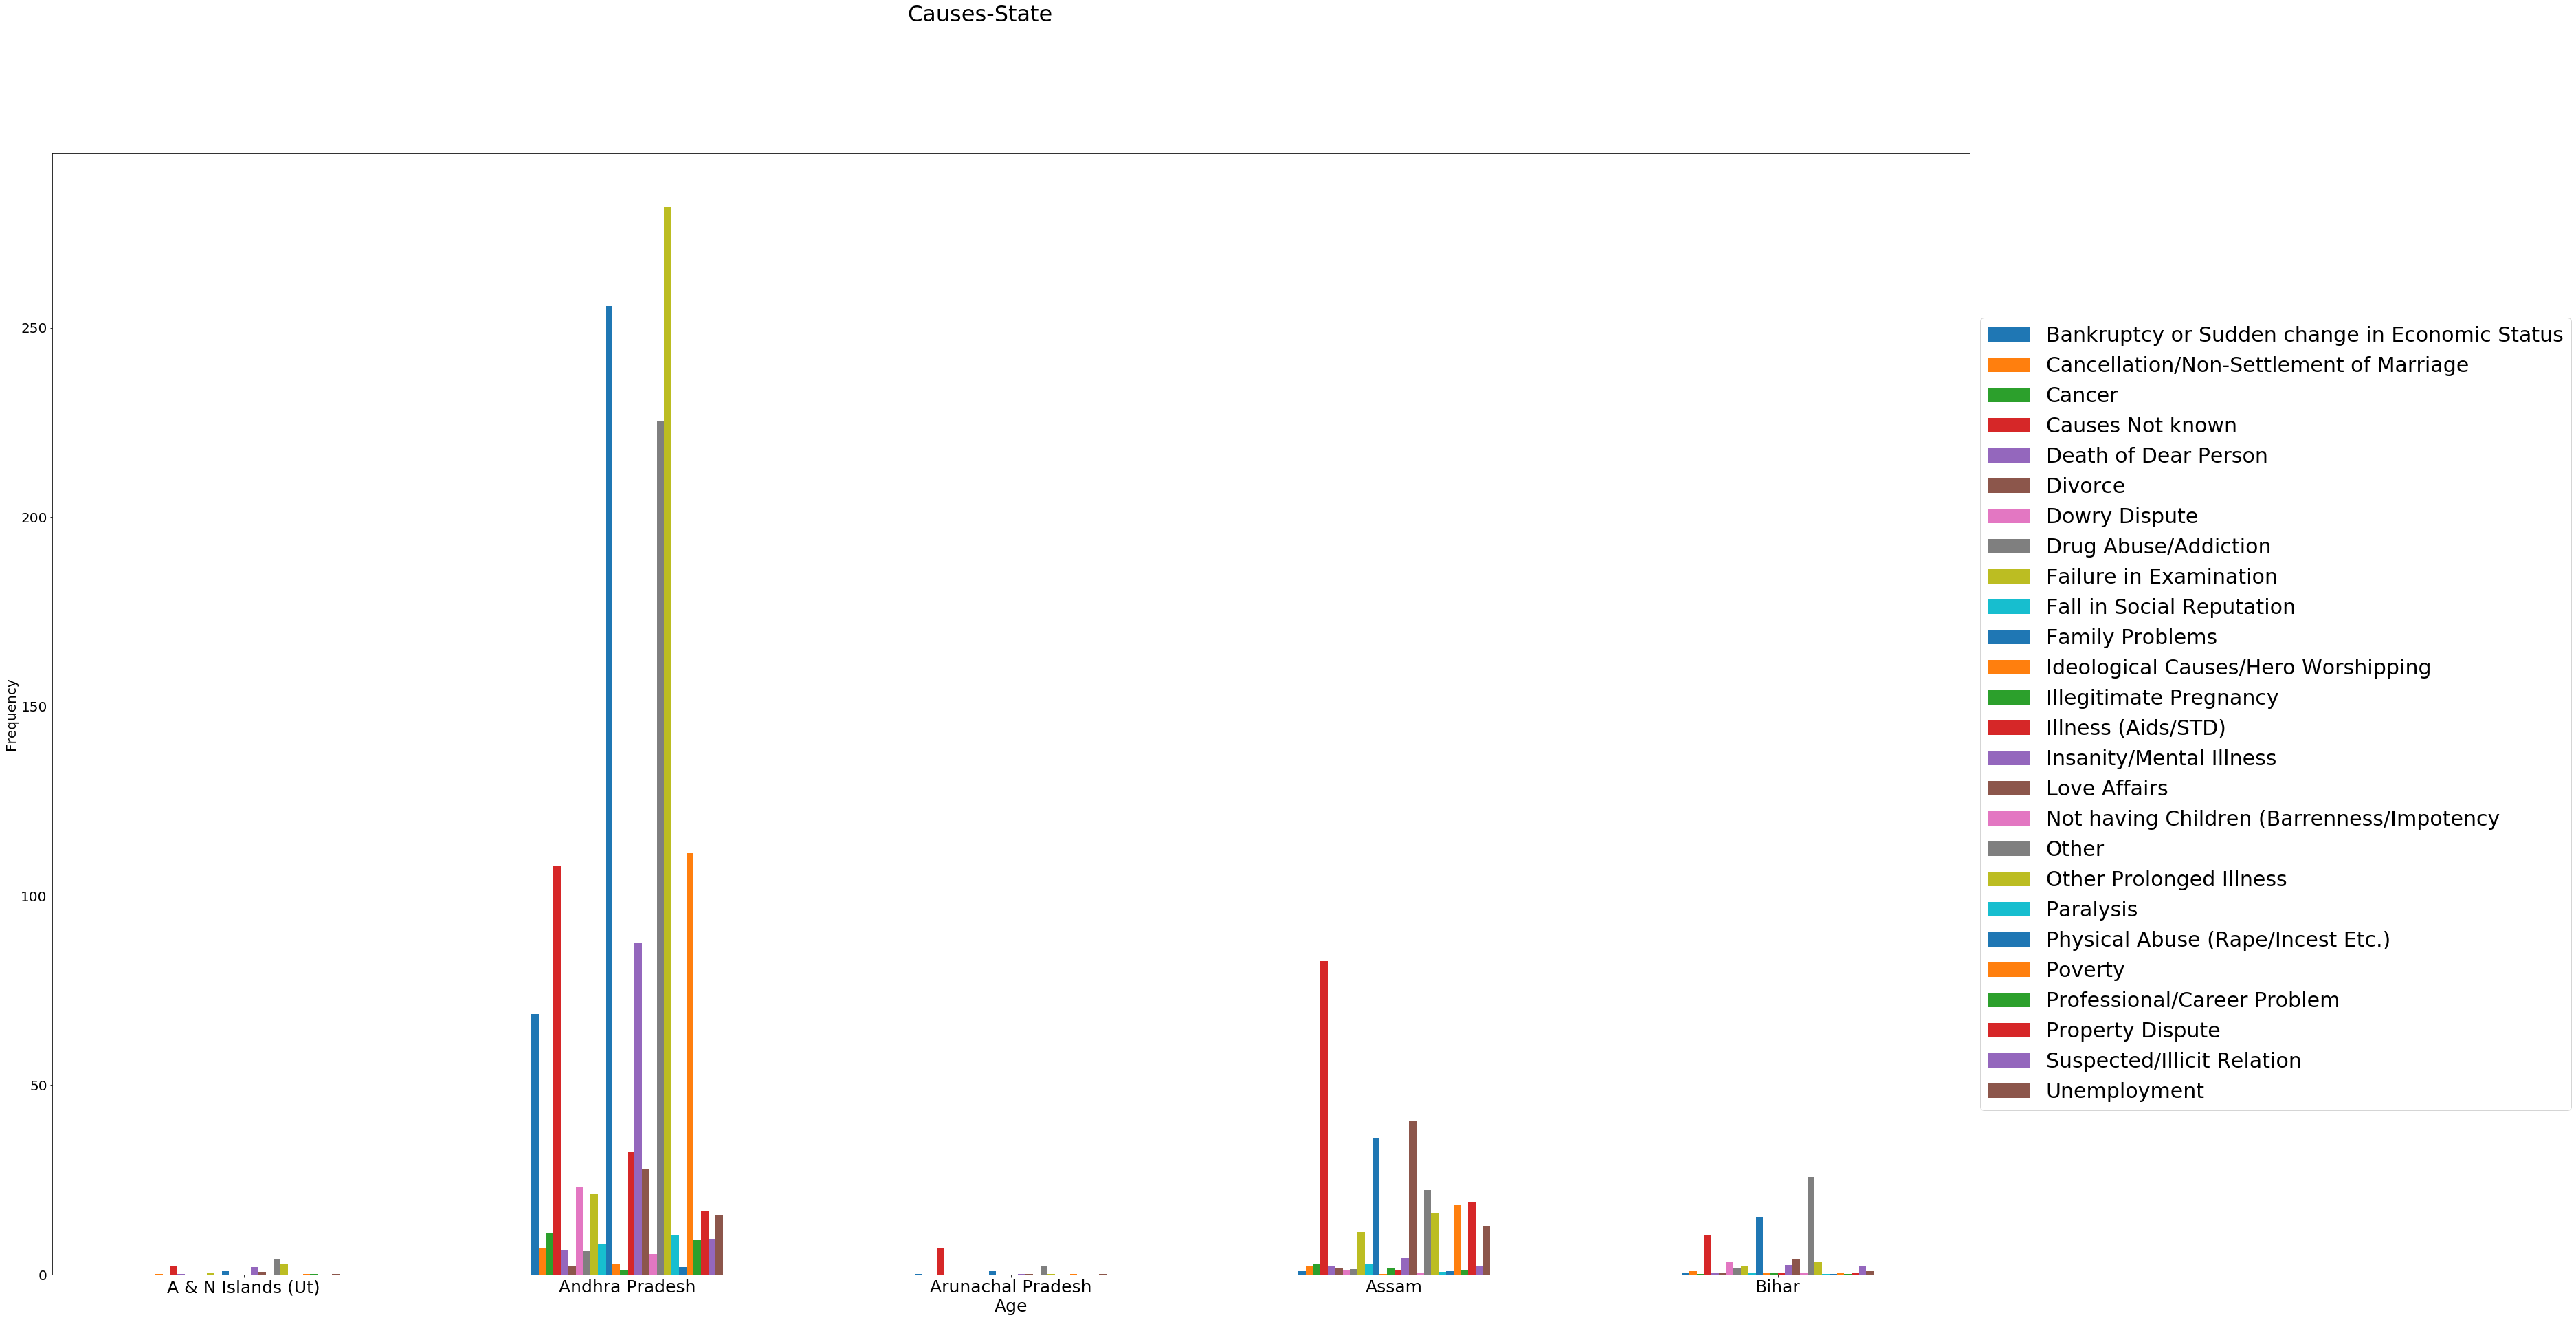

In [147]:
(state_causes.drop('sum', axis=1)).head().plot.bar(figsize=(50,30))
plt.xlabel('Age', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle('Causes-State',fontsize=32)
plt.xticks(fontsize=25, rotation=360)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

# Andhra Pradesh has more sucides due to "Prolonged illness"

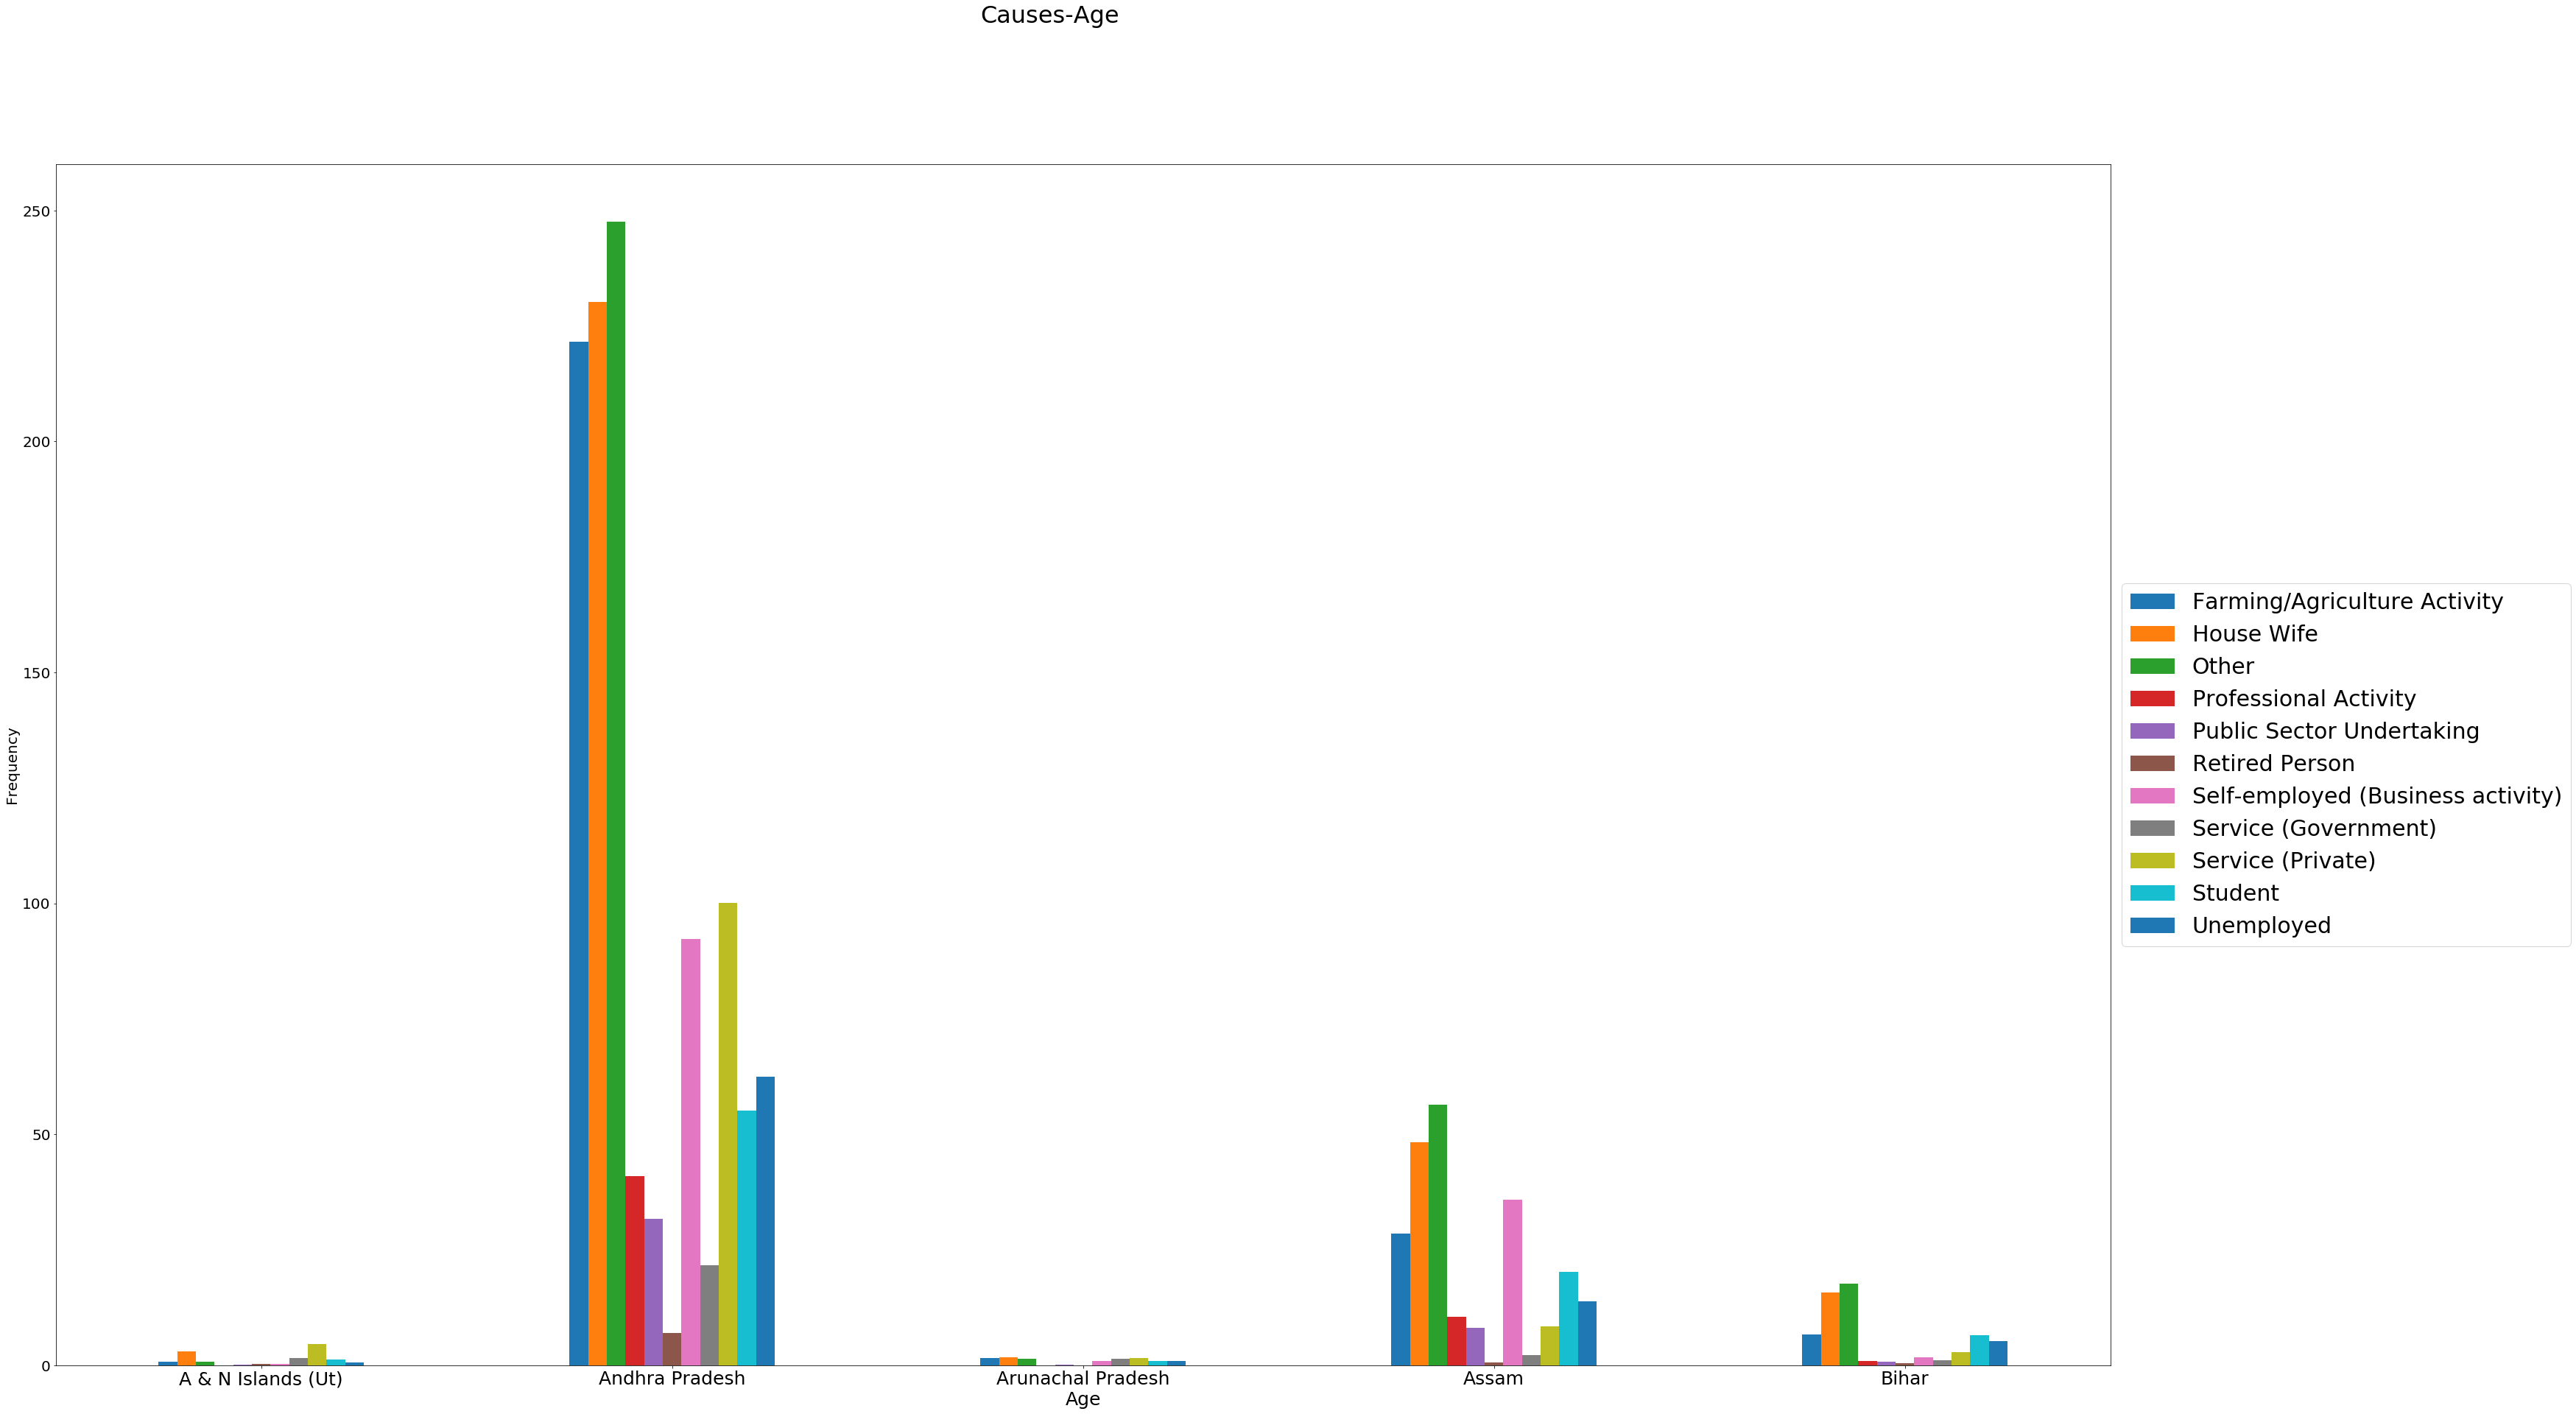

In [144]:
state_prof.head().plot.bar(figsize=(50,30))
plt.xlabel('Age', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle('Causes-Age',fontsize=32)
plt.xticks(fontsize=25, rotation=360)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

# Farming is almost always the main occupation of people commiting sucide

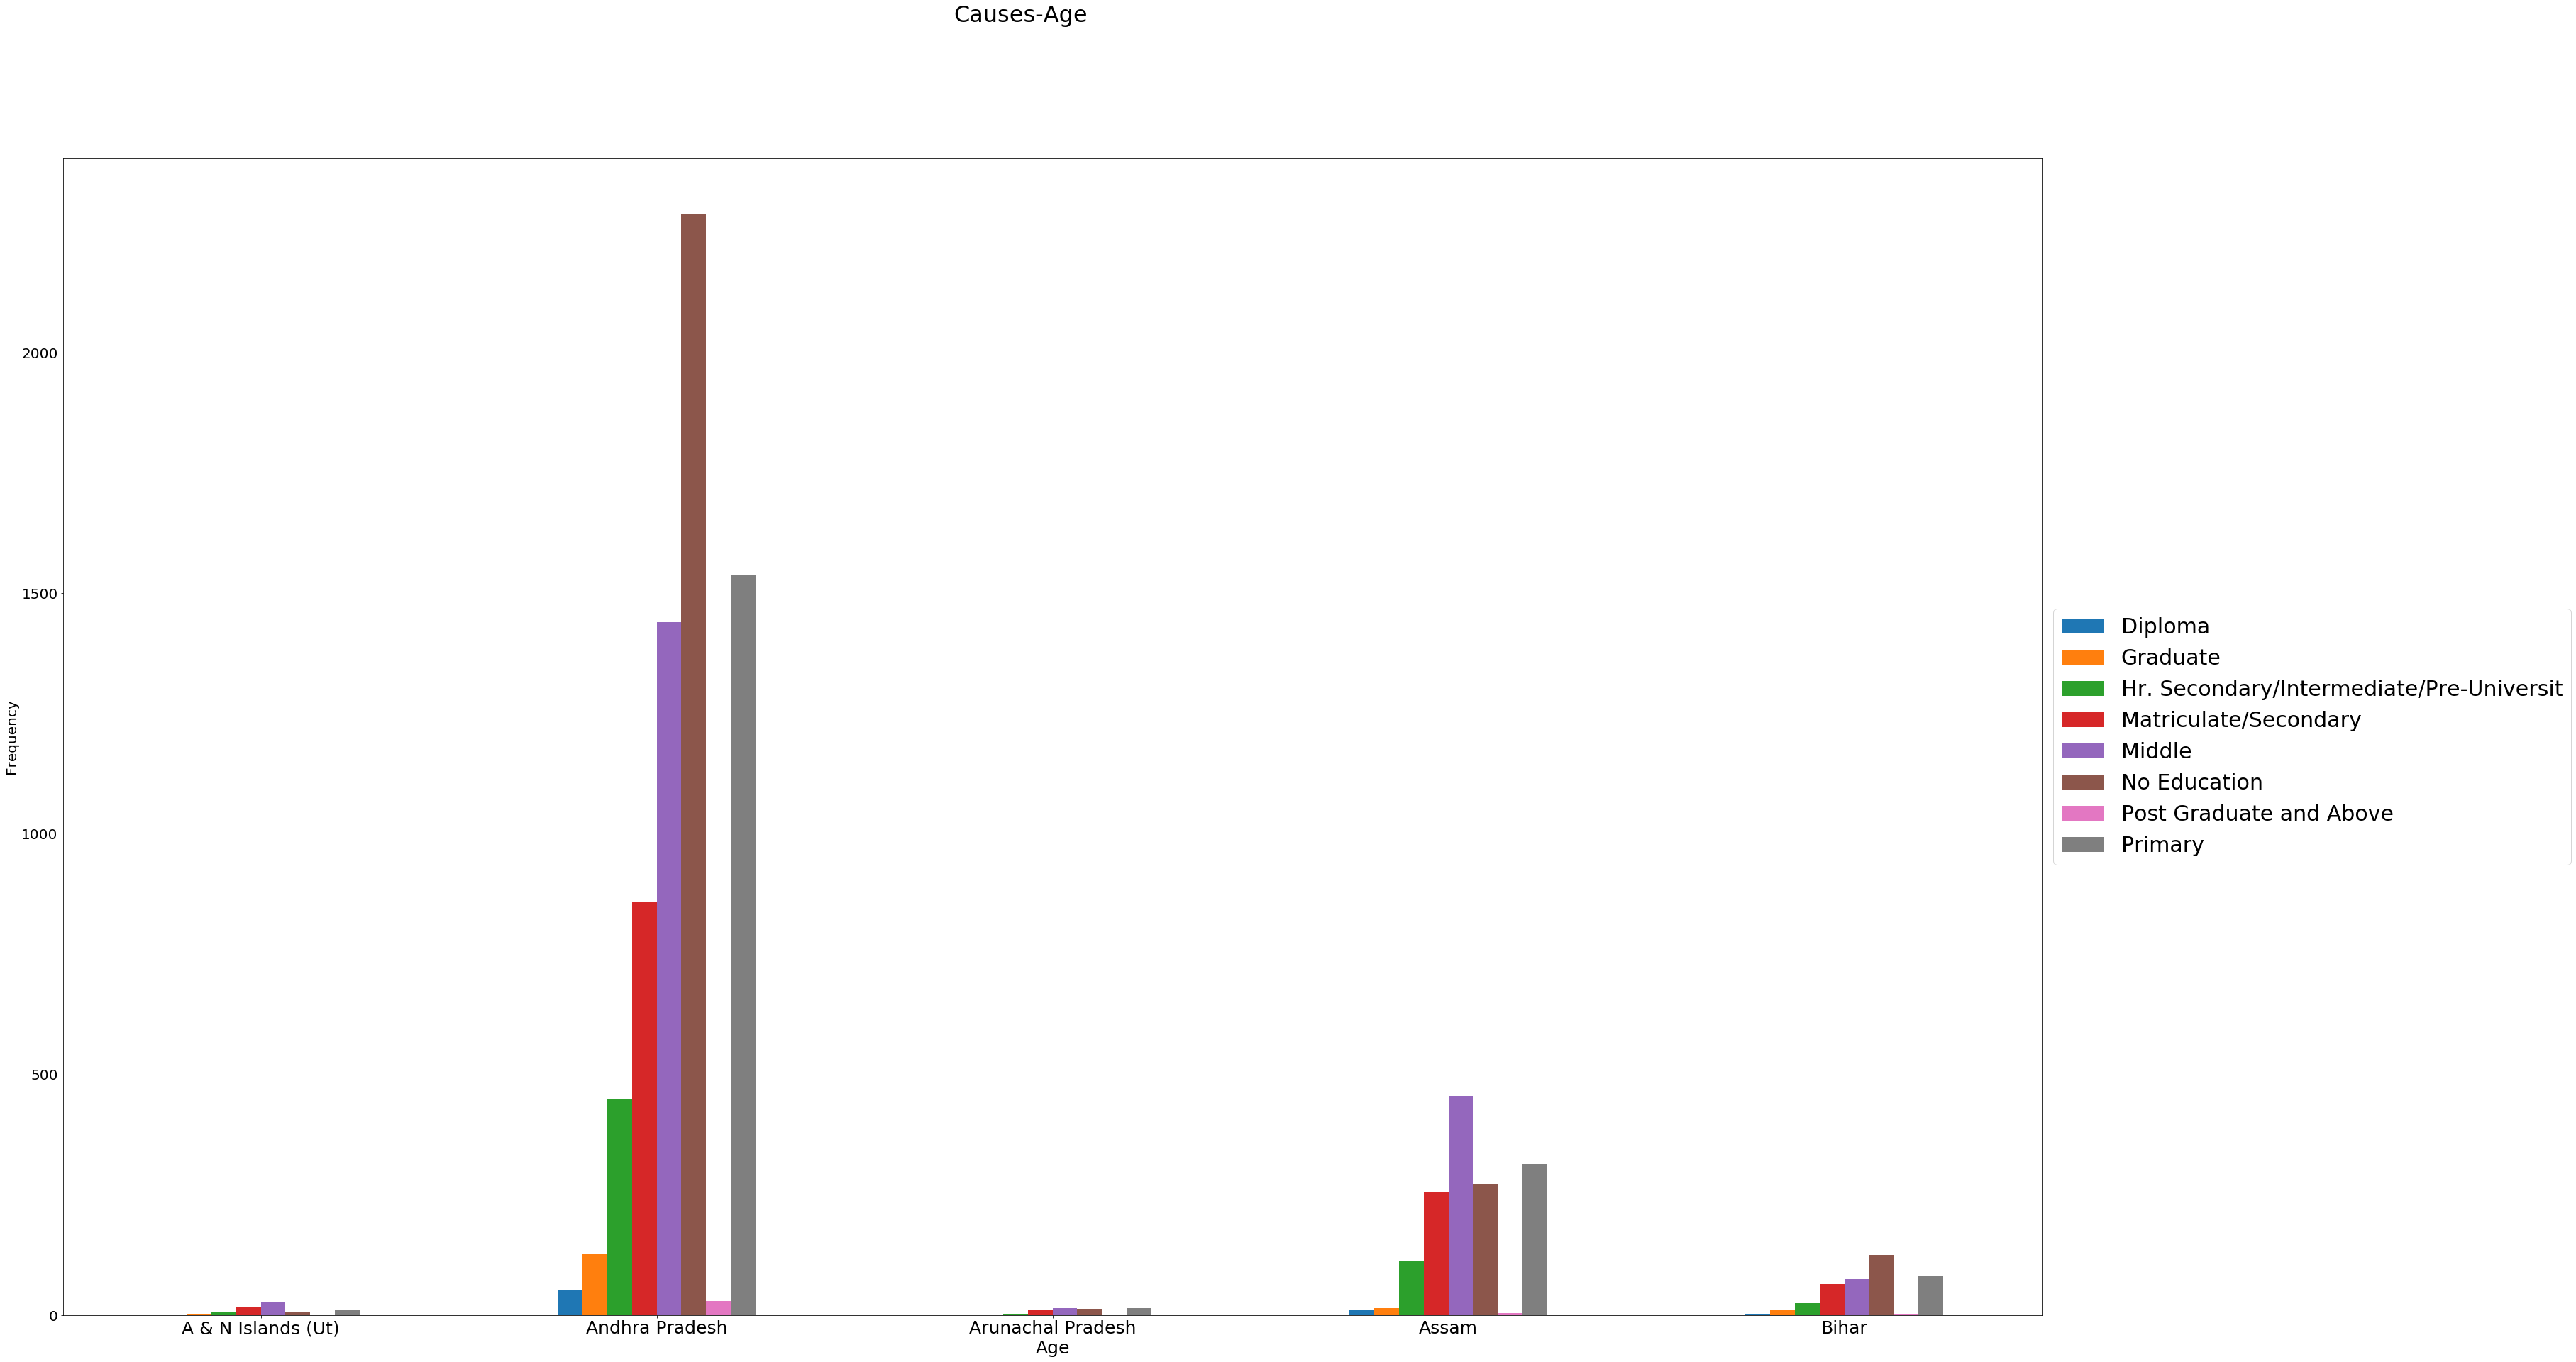

In [156]:
state_edu.head().plot.bar(figsize=(50,30))
plt.xlabel('Age', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle('Causes-Age',fontsize=32)
plt.xticks(fontsize=25, rotation=360)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

# In AP and Bihar non-educated people are the majority

# What can be done? 


## As for most of them 'Education level' is 'Primary' ,and people with higher education are less so might be possible that improvement in education reduces the cases
## Housewives and Farmers are the majority,so there should be some scheme from govt.which employs the housewives(even if it is for shorter period),this will make them independent/less dependent economically so they can stand against any injustice done towards them
## There should be some scheme for the poor farmers, who are not able to feed themselves and their families while carrying the burden of feeding the whole nation